# Description

This notebook takes the combined csv file that has info about minutes played and team, season, week, opponent, home/away, and player names, and calculates accuracy of simple predictive models that:
- Take last 5 weeks average minutes played.
- Randomly takes minutes played from last 5 weeks

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Load the combined data
csv_path = ('../datasets/black_dataframe/combined_player_time.csv')

df = pd.read_csv(csv_path)

In [3]:
def last_weeks_avg(df, weeks=5):
    # Sort by player and week to ensure correct rolling calculation
    df = df.sort_values(['player', 'week'])
    df['last_weeks_avg'] = df.groupby('player')['minutes_played'].transform(
        lambda x: x.rolling(window=weeks, min_periods=1).mean())
    
    return df

In [4]:
# Apply the function to calculate the last 5 weeks average
df = last_weeks_avg(df, weeks=5)

In [6]:
# Calculate the RMSE between minutes_played and last_weeks_avg
rmse = np.sqrt(((df['minutes_played'] - df['last_weeks_avg']) ** 2).mean())

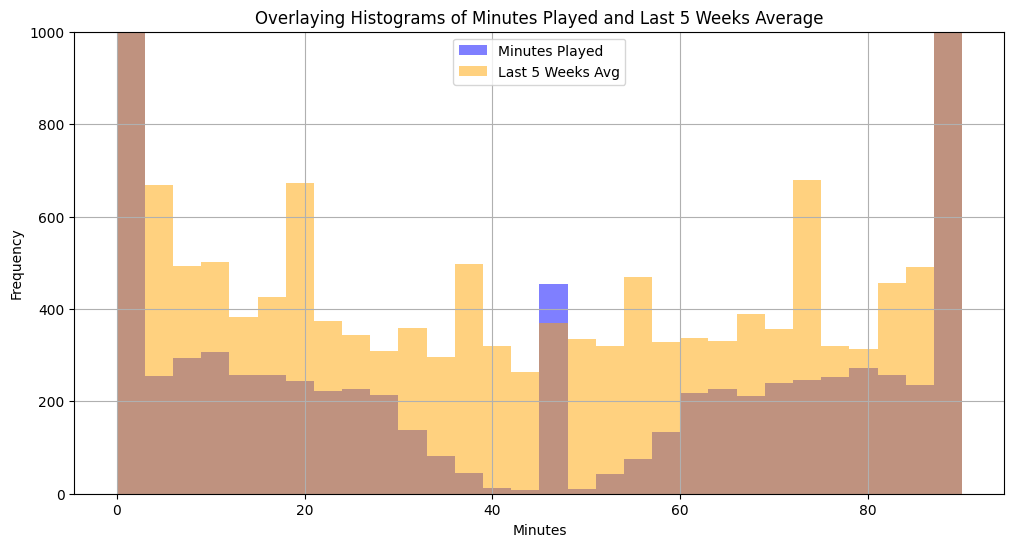

In [12]:
# Plot overlaying histograms of minutes played and last weeks average
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(df['minutes_played'], bins=30, alpha=0.5, label='Minutes Played', color='blue')
plt.hist(df['last_weeks_avg'], bins=30, alpha=0.5, label='Last 5 Weeks Avg', color='orange')
plt.title('Overlaying Histograms of Minutes Played and Last 5 Weeks Average')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
# Add a ylim for 6000
plt.ylim(0, 1000)
plt.savefig('minutes_played_vs_last_weeks_avg.png')
plt.show()



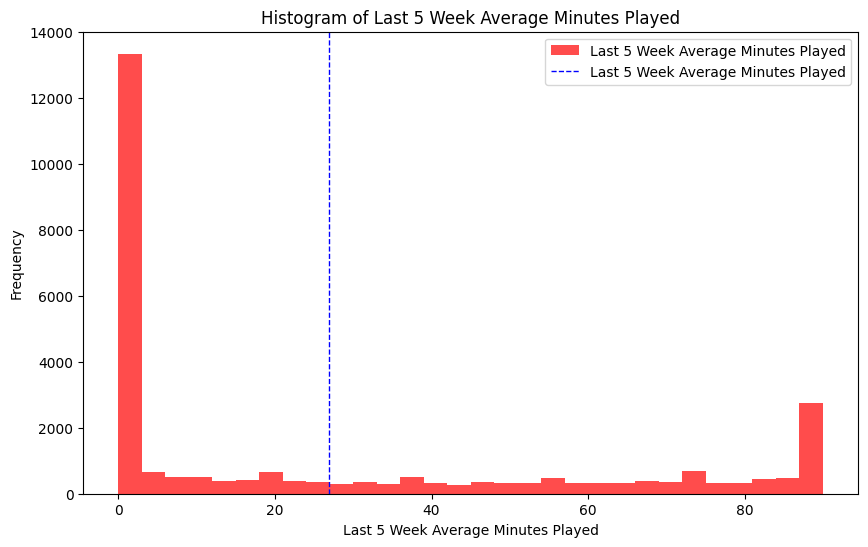

In [8]:
# Plot a histogram of last_weeks_avg
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['last_weeks_avg'], bins=30, alpha=0.7, color='red', label='Last 5 Week Average Minutes Played')
plt.axvline(df['last_weeks_avg'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Last 5 Week Average Minutes Played')
plt.title('Histogram of Last 5 Week Average Minutes Played')
plt.xlabel('Last 5 Week Average Minutes Played')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('last_five_weeks_minutes_played.png')
plt.show()

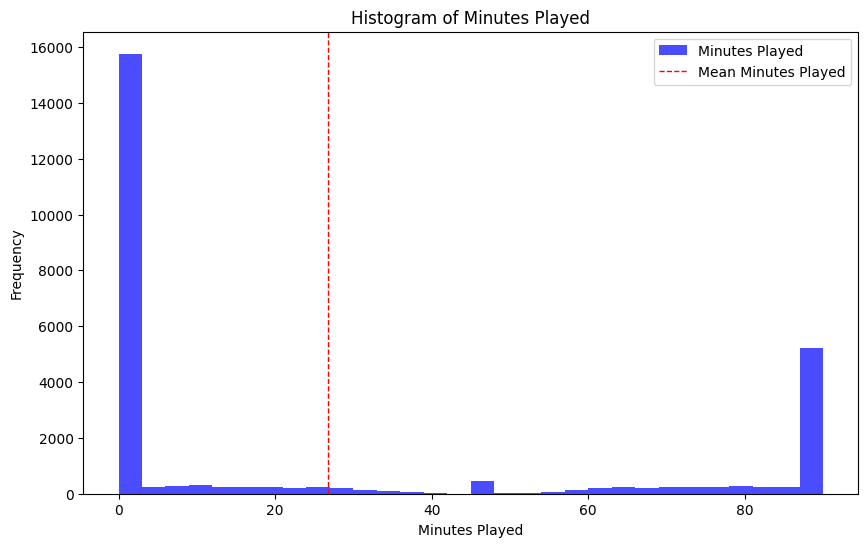

In [7]:
# Plot a histogram of minutes played
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['minutes_played'], bins=30, alpha=0.7, color='blue', label='Minutes Played')
plt.axvline(df['minutes_played'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Minutes Played')
plt.title('Histogram of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('minutes_played_histogram.png')
plt.show()